**IMPORTING THE LIBRARIES**

In [2]:
import tensorflow as tf #TF is a free and open-source software library for ML
import keras #TF already contain data which can be loaded through keras
import cv2 #CV to load & process images
import numpy as np #python library important for working with numpy arrays
import matplotlib.pyplot as plt #plotting library of python for visulaization of actual digits
from keras.datasets import mnist # importing dataset
from keras.models import Sequential #importing sequential class from 'model' module of Keras library for adding neural network layers
from keras.layers import Dense, Dropout, Flatten #importing 3 classes from 'layers' module of Keras library. Dense is a fully connected layer, dropout is used for regularization & preventing overfitting, flatten flats input data from multidimention to 1D
from keras.layers import Conv2D, MaxPooling2D #importing 2 classes from layers module of Keras library. Conv2D is used for 2D convolution, MaxPooling2D is used for downsampling or pooling in CNN.
from keras import backend as K #importing backend module from Keras library & aliasing it with K to work with different backend like TF without modifying the code

**Assigning "MNIST28x28 grayscale dataset of 70,000 handwritten images of 10 digits from 0–9" to variable "dataset**

In [3]:
dataset=tf.keras.datasets.mnist
print(dataset)

<module 'keras.api._v2.keras.datasets.mnist' from 'D:\\Anaconda\\anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>


**SPLITTING THE  MNIST DATA IN TO TRAIN AND TEST DATASETS**

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()  #unpacking the dataset in train and test


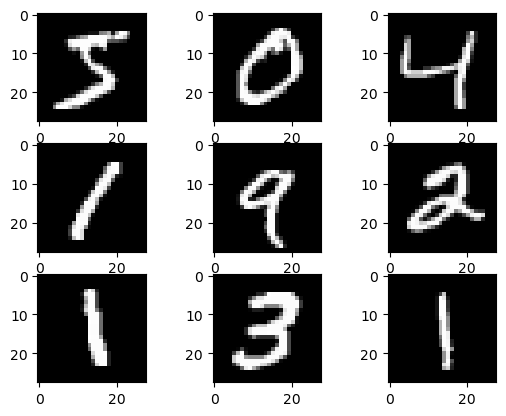

In [5]:
#plot first few images in the dataset is also created showing the natural handwritten nature of the images to be classified.

for i in range(9):
    
    plt.subplot(330 + 1 + i)
    
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [6]:
print(x_train.shape, y_train.shape) #The 'shape' attribute of a NumPy array returns the dimensions of the array

(60000, 28, 28) (60000,)


In [7]:
x_train.shape #finding train data

(60000, 28, 28)

In [8]:
x_test.shape #finding test data

(10000, 28, 28)

**PREPROCESSING**

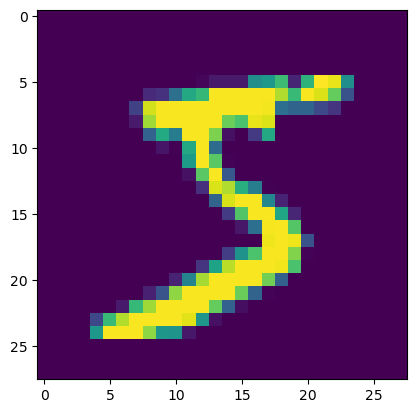

In [9]:
plt.imshow(x_train[0]) #checking the first image of train data for better configuration

**1.COLOR MAPPING TO B & W**

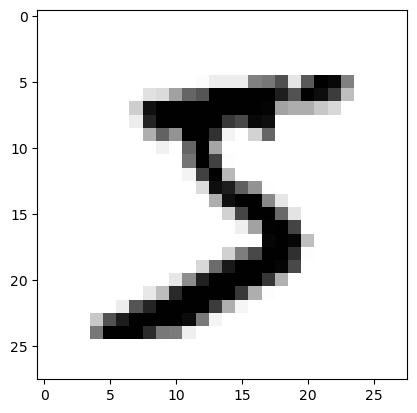

In [10]:
plt.imshow(x_train[0], cmap = plt.cm.binary) # showing as binary image, cmap is a colormap where lower values are displayed as black & higher values are displayed as white

In [11]:
print(x_train[0]) #printing the value for each pixel

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

**2.NORMALIZATION**

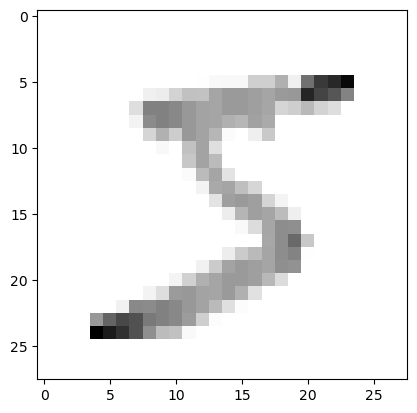

In [12]:
x_train=tf.keras.utils.normalize(x_train ,axis=1) #another method is x_train/255 but we'll use built in cmd
x_test=tf.keras.utils.normalize(x_test ,axis=1) #0 is for column and 1 is for row, we can also use 0
plt.imshow(x_train[0] ,cmap= plt.cm.binary)

In [13]:
#After Normalization values come in 0 to 1 range
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [14]:
print(y_train[0])

5


**3.RESHAPING**

In [15]:
image_size=28
x_train = np.array(x_train).reshape(-1, image_size, image_size, 1) #adding one dimension for CNN opeartion
x_test = np.array(x_test).reshape(-1 ,image_size, image_size, 1) #adding one dimension for CNN operation
input_shape=(28,28,1)
print( "Training Sample dimension", x_train.shape)
print( "Testing Sample dimension", x_test.shape)

Training Sample dimension (60000, 28, 28, 1)
Testing Sample dimension (10000, 28, 28, 1)


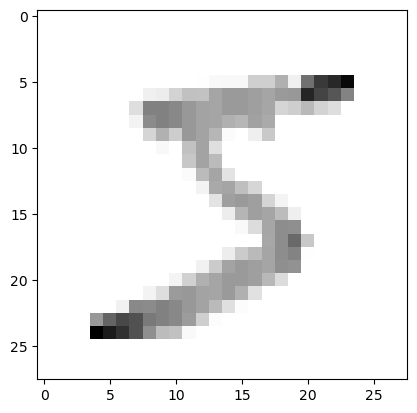

In [16]:
plt.imshow(x_train[0] ,cmap = plt.cm.binary)

In [17]:
# convert class vectors to binary class matrices

y_train = keras.utils.to_categorical(y_train, 10) #categorizing
y_test = keras.utils.to_categorical(y_test, 10)

In [18]:
x_train = x_train.astype('float32') # datatype
x_test = x_test.astype('float32')

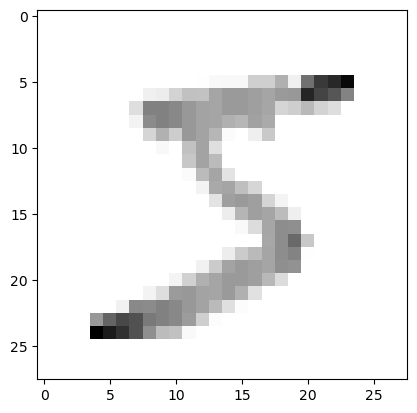

In [19]:
plt.imshow(x_train[0] ,cmap=plt.cm.binary)

**CREATING A DEEP NEURAL NETWORK**

**APPLYING MODEL**

In [20]:
batch_size = 128
num_classes = 10
epochs = 10
model = Sequential()

model.add(Conv2D(25, kernel_size=(4, 4),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
#Output
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**TRAINING THE MODEL**

In [21]:
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")

Epoch 1/10
469/469 [==============================] - 57s 120ms/step - loss: 0.2440 - accuracy: 0.9260 - val_loss: 0.0631 - val_accuracy: 0.9802
Epoch 2/10
469/469 [==============================] - 63s 134ms/step - loss: 0.0782 - accuracy: 0.9764 - val_loss: 0.0408 - val_accuracy: 0.9861
Epoch 3/10
469/469 [==============================] - 57s 121ms/step - loss: 0.0548 - accuracy: 0.9834 - val_loss: 0.0319 - val_accuracy: 0.9892
Epoch 4/10
469/469 [==============================] - 58s 123ms/step - loss: 0.0437 - accuracy: 0.9865 - val_loss: 0.0313 - val_accuracy: 0.9907
Epoch 5/10
469/469 [==============================] - 57s 121ms/step - loss: 0.0370 - accuracy: 0.9884 - val_loss: 0.0298 - val_accuracy: 0.9907
Epoch 6/10
469/469 [==============================] - 57s 122ms/step - loss: 0.0297 - accuracy: 0.9905 - val_loss: 0.0269 - val_accuracy: 0.9911
Epoch 7/10
469/469 [==============================] - 58s 123ms/step - loss: 0.0271 - accuracy: 0.9913 - val_loss: 0.0280 - val_ac

**EVALUATING MODEL ACCURACY**

In [22]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.027164248749613762
Test accuracy: 0.9916999936103821


**GUI INTERFACE FOR PREDICTING DIGIT**

In [23]:
from keras.models import load_model
from tkinter import *
import tkinter as tk
from PIL import ImageGrab, Image
import numpy as np

In [24]:
#model = load_model('mnist.h5')

def predict_digit(img):
    #resize image to 28x28 pixels
    img = img.resize((28,28))
    #convert rgb to grayscale
    img = img.convert('L')
    img = np.array(img)
    #reshaping to support our model input and normalizing
    img = img.reshape(1,28,28,1)
    img = img/255.0
    #predicting the class
    res = model.predict([img])[0]
    return np.argmax(res), max(res)

In [25]:
predictions=model.predict([x_test])
print(predictions)
print(np.argmax(predictions[0]))

313/313 [==============================] - 4s 11ms/step
[[4.39356749e-13 4.26402837e-11 2.37444620e-09 ... 9.99999821e-01
  9.28743540e-11 6.55670629e-09]
 [2.97600278e-09 5.54314603e-08 9.99999940e-01 ... 9.33555344e-10
  1.10469507e-11 7.63062082e-15]
 [1.56346134e-11 9.99998868e-01 2.49695500e-08 ... 5.71496228e-09
  1.29298115e-07 2.17599549e-10]
 ...
 [2.06980534e-16 8.75583009e-11 1.16183254e-13 ... 1.69339584e-10
  1.20750743e-08 4.09312655e-08]
 [7.47462422e-12 1.14365884e-12 4.17243714e-12 ... 5.06277867e-11
  1.10983070e-04 6.30431596e-10]
 [4.40207382e-09 1.14763354e-09 7.47174767e-08 ... 1.07884376e-14
  2.87198567e-08 1.24337335e-12]]
7


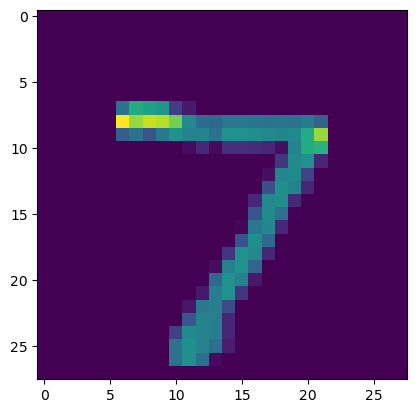

In [26]:
plt.imshow(x_test[0])

In [27]:
print(np.argmax(predictions[5]))

1


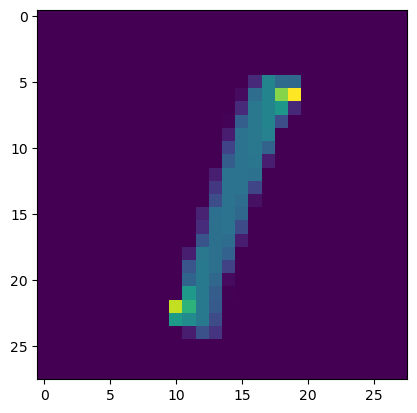

In [28]:
plt.imshow(x_test[5])

In [36]:
class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)

        self.x = self.y = 0
        
        # Creating elements
        self.canvas = tk.Canvas(self, width=400, height=400, bg = "black", cursor="cross")
        self.label = tk.Label(self, text="Draw..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "RECOGNIZE", command = self.classify_handwriting, bg="cyan")   
        self.button_clear = tk.Button(self, text = "CLEAR", command = self.clear_all, bg="green")
       
        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)
        
        #self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)

    def clear_all(self):
        self.canvas.delete("all")
        
    def classify_handwriting(self):
        HWND = self.canvas.winfo_id()  # get the handle of the canvas
        x, y = (self.canvas.winfo_rootx(), self.canvas.winfo_rooty())# get the coordinate of the canvas
        width, height = (self.canvas.winfo_width(), self.canvas.winfo_height())

        a, b, c, d = (x, y, x+width, y+height)
        rect=(a,b,c,d)
        im = ImageGrab.grab(rect)

        digit, acc = predict_digit(im)
        self.label.configure(text= str(digit)+', '+ str(int(acc*100))+'%')

    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='white')
app = App()
mainloop()

1/1 [==============================] - 0s 20ms/step
